# _Clustering_

El clustering o agrupamiento es la tarea de agrupar una serie de objetos de una manera que objetos del mismo grupo (cluster) son más similares entre sí que con los de otros grupos. Su objetivo principal es en la fase exploratoria de los datos y se clasifica dentro de los métodos no supervisados de aprendizaje de máquinas.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import sklearn.cluster # Algoritmos de clustering
import sklearn.metrics
import scipy.cluster
import seaborn as sns

## k-Means

Para explorar el funcionamiento de k-Means utilizaremos un conjunto de datos sintético para la detección de grupos dentro de un conjunto de puntos de datos.

In [2]:
blobs = pd.read_csv("data/blobs.csv") # Importamos un csv que contiene los datos a analizar

In [3]:
blobs.head() # Verificamos qué podemos encontrar en el conjunto de datos.

,x,y
0,-7.028929,6.461681
1,7.918778,1.532250
2,7.715440,-1.071657
3,-6.947604,7.059319
4,8.229129,5.251265


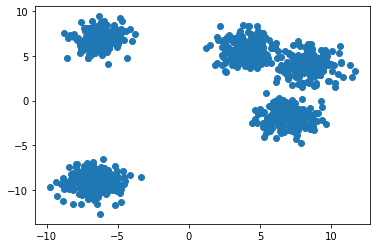

In [4]:
plt.scatter(blobs.x, blobs.y) # Exploramos la distribución que tienen nuestros datos

Intuitivamente podemos desprender que existe cierto agrupamiento de los datos. Uno de los algoritmos para realizar clustering es el k-means. Procederemos a realizar un agrupamiento utilizando este algoritmo.

El primer paso es generar tantos centroides al azar como grupos queremos ajustar.

In [5]:
def initialize_centroids(data, k):
    centroids = []
    for i in range(k):
        centroids.append(np.random.random(data.shape[1]) * (data.max() - data.min()) + data.min())
    return np.vstack(centroids)

In [6]:
centroids = initialize_centroids(blobs, 5)
centroids

array([[  1.02514918,   8.67211513],
       [  6.06507371,   1.19168243],
       [ -2.86648351,  -7.29671808],
       [ -2.88698869,   5.13643881],
       [  8.02528834, -11.54367073]])

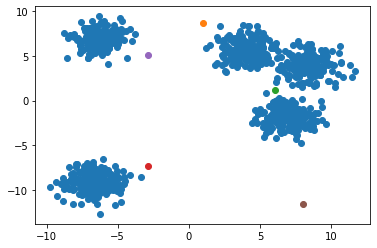

In [7]:
plt.scatter(blobs.x, blobs.y) # Exploramos la distribución que tienen nuestros datos
for centroid in centroids:
    plt.scatter(centroid[0], centroid[1])

Después, debemos calcular la distancia de cada punto del conjunto de datos hacia cada uno de los centroides.

In [8]:
distances = sklearn.metrics.pairwise.euclidean_distances(blobs,centroids)
distances

array([[ 8.35189721, 14.11473635, 14.37426511,  4.34878526, 23.46960039],
       [ 9.92470571,  1.88472925, 13.93816835, 11.39099467, 13.07635472],
       [11.819522  ,  2.80114575, 12.27715327, 12.2862509 , 10.47659619],
       ...,
       [19.30663905, 15.47328973,  3.16383527, 14.96900364, 13.09037512],
       [20.62003052, 17.98443376,  5.87106611, 15.8257252 , 16.31047687],
       [ 8.45340375, 14.25525561, 14.47658394,  4.48769635, 23.60200376]])

Asignamos cada punto del conjunto de datos al cluster asociado al centroide más cercano.

In [9]:
labels = distances.argmin(axis=1)
labels

array([3, 1, 1, 3, 1, 2, 1, 0, 1, 2, 3, 0, 0, 1, 3, 1, 1, 3, 3, 0, 2, 3,
       3, 2, 1, 2, 0, 1, 1, 3, 1, 2, 3, 1, 2, 1, 3, 1, 1, 1, 1, 1, 3, 2,
       0, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 3, 0, 1, 1, 1, 2, 1, 1, 1, 3, 2,
       1, 1, 1, 2, 1, 2, 3, 1, 3, 1, 1, 1, 0, 1, 0, 1, 2, 1, 1, 1, 1, 1,
       3, 3, 1, 0, 3, 3, 1, 1, 3, 0, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1,
       2, 1, 1, 2, 3, 1, 2, 2, 1, 1, 1, 2, 2, 1, 3, 0, 1, 1, 3, 3, 0, 2,
       1, 1, 3, 2, 1, 1, 1, 1, 0, 1, 1, 3, 2, 1, 1, 0, 0, 3, 1, 2, 2, 1,
       1, 3, 1, 0, 3, 1, 0, 1, 1, 1, 2, 1, 0, 1, 3, 2, 1, 1, 3, 1, 3, 2,
       1, 3, 1, 2, 0, 1, 1, 1, 2, 2, 0, 2, 3, 0, 1, 1, 2, 1, 2, 1, 1, 1,
       1, 2, 1, 1, 2, 2, 0, 3, 1, 2, 1, 1, 2, 0, 0, 1, 1, 1, 1, 0, 0, 2,
       1, 3, 1, 1, 2, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 0,
       1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 0, 1, 1, 2, 2,
       0, 0, 1, 2, 1, 1, 3, 2, 0, 3, 0, 1, 3, 1, 3, 0, 3, 1, 1, 2, 3, 3,
       1, 2, 0, 0, 1, 1, 1, 2, 3, 2, 1, 2, 0, 3, 1,

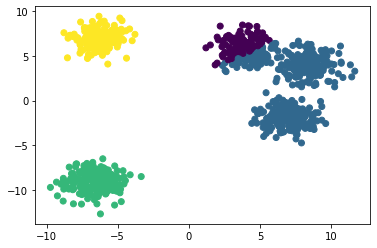

In [10]:
plt.scatter(blobs.x, blobs.y, c = labels) # Exploramos la distribución que tienen nuestros datos

In [11]:
def label_data(data,centroids):
    distances = sklearn.metrics.pairwise.euclidean_distances(blobs,centroids)
    labels = distances.argmin(axis=1)
    return labels

Recalculamos los centroides al calcular el centroide a cada cluster etiquetado anteriormente.

In [12]:
new_centroids = blobs.groupby(by=labels).agg("mean")
new_centroids

,x,y
0,3.725636,6.222142
1,7.239849,1.568340
2,-6.599576,-9.045656
3,-6.303589,6.992339


In [13]:
def recompute_centroids(data, labels):
    centroids = data.groupby(by=labels).agg("mean")
    return np.array(centroids)

Reasignamos los cluster a su nuevo centroide más cercano.

In [14]:
new_labels = label_data(blobs,new_centroids)
new_labels

array([3, 1, 1, 3, 1, 2, 1, 0, 1, 2, 3, 0, 0, 1, 3, 1, 1, 3, 3, 0, 2, 3,
       3, 2, 0, 2, 0, 1, 1, 3, 1, 2, 3, 1, 2, 1, 3, 1, 1, 1, 1, 1, 3, 2,
       0, 3, 3, 2, 1, 0, 1, 1, 1, 1, 3, 3, 0, 1, 1, 1, 2, 1, 0, 1, 3, 2,
       1, 1, 1, 2, 1, 2, 3, 1, 3, 1, 1, 1, 0, 1, 0, 1, 2, 1, 1, 0, 0, 1,
       3, 3, 1, 0, 3, 3, 1, 0, 3, 0, 1, 1, 1, 1, 2, 1, 0, 2, 2, 0, 2, 1,
       2, 1, 1, 2, 3, 1, 2, 2, 1, 1, 1, 2, 2, 1, 3, 0, 1, 1, 3, 3, 0, 2,
       1, 1, 3, 2, 1, 1, 1, 1, 0, 1, 1, 3, 2, 1, 1, 0, 0, 3, 0, 2, 2, 1,
       1, 3, 0, 0, 3, 1, 0, 1, 1, 1, 2, 0, 0, 1, 3, 2, 1, 1, 3, 0, 3, 2,
       1, 3, 1, 2, 0, 1, 1, 1, 2, 2, 0, 2, 3, 0, 1, 1, 2, 1, 2, 1, 1, 1,
       1, 2, 1, 1, 2, 2, 0, 3, 1, 2, 1, 1, 2, 0, 0, 1, 1, 1, 0, 0, 0, 2,
       0, 3, 1, 1, 2, 0, 0, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 0,
       0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 0, 1, 1, 2, 2,
       0, 0, 1, 2, 1, 1, 3, 2, 0, 3, 0, 0, 3, 1, 3, 0, 3, 1, 1, 2, 3, 3,
       1, 2, 0, 0, 1, 1, 0, 2, 3, 2, 1, 2, 0, 3, 1,

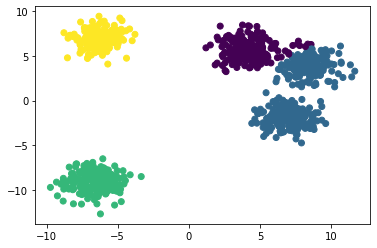

In [15]:
plt.scatter(blobs.x, blobs.y, c = new_labels) # Exploramos la distribución que tienen nuestros datos

Repetimos el arlogitmo varias veces para asignar los cluster.

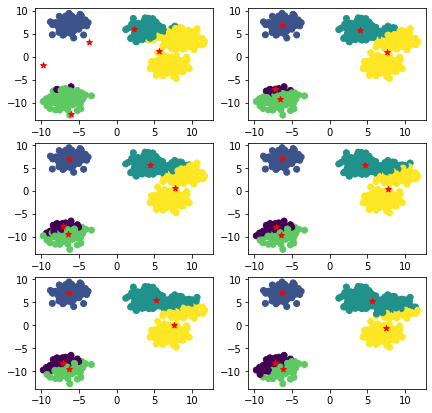

In [16]:
centroids = initialize_centroids(blobs, 5)
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(7,7))
for ax in axs.reshape(-1): 
    labels = label_data(blobs,centroids)
    ax.scatter(blobs.x, blobs.y, c = labels)
    ax.scatter(centroids[:,0], centroids[:,1], marker="*", c = "red")
    centroids = recompute_centroids(blobs, labels)

k-Means necesita que nosotros asignemos el hiperparámetro de la cantidad de grupos a ajustar, comenzaremos con 2 grupos.

Ajustamos un modelo de k-means.

In [17]:
km = sklearn.cluster.KMeans(n_clusters=2, random_state=11) # Instanciamos el algoritmo de k-means
km.fit(blobs) # Ajustamos el modelo de k-means

KMeans(n_clusters=2, random_state=11)

In [18]:
km.labels_ # Grupos a los cuales asoció el modelo a cada una de las instancias del conjunto de datos

array([0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,

Se puede observar que al parecer la cantidad de grupos asignada al modelo no es la más correcta.

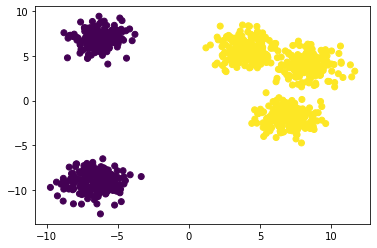

In [19]:
plt.scatter(blobs.x, blobs.y, c = km.labels_) # Verificamos gráficamente el agrupamiento

Utilizaremos el método del codo para intentar encontrar la cantidad de grupos óptima en nuestro conjunto de datos.

El método del codo busca encontrar la cantidad óptima de grupos al iterar por un rango de cantidad de grupos para encontrar dónde se genera un cambio en la pendiente de la curva de dispersión de los grupos contra la cantidad de grupos.

In [20]:
inertias = []
n_clusters_iterable = range(1,10)
for n_clusters in n_clusters_iterable:
    km = sklearn.cluster.KMeans(n_clusters=n_clusters) # Instanciamos el algoritmo de k-means
    km.fit(blobs) # Ajustamos el modelo de k-means
    inertias.append(km.inertia_) # Esta la dispersión de nuestros grupos

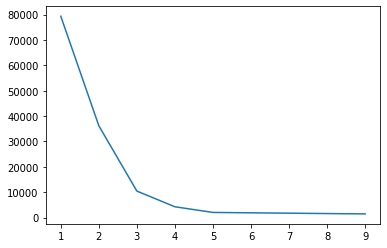

In [21]:
plt.plot(
    n_clusters_iterable,
    inertias
)

Otro método de optimización de la cantidad de grupos es el método de la silueta, en donde se busca maximizar el silhouette score al modular el número de clusters.

El silhouette score es un promedio de las siluetas de cada punto. Cada silueta se calcula usando la distancia intra-cluster promedio $a$ y la distancia promedio al cluster más cercano $b$, por lo tanto el valor de la silueta es

$$
\frac{b - a}{ max(a,b) }
$$

In [22]:
silhouette_scores = []
n_clusters_iterable = range(2,10)
for n_clusters in n_clusters_iterable:
    km = sklearn.cluster.KMeans(n_clusters=n_clusters) # Instanciamos el algoritmo de k-means
    km.fit(blobs) # Ajustamos el modelo de k-means
    silhouette_scores.append(sklearn.metrics.silhouette_score(blobs, km.labels_)) # Esta la dispersión de nuestros grupos

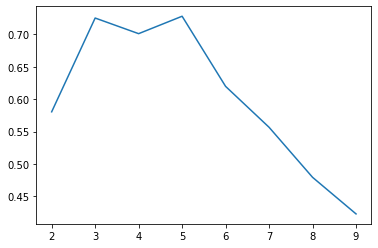

In [23]:
plt.plot(
    n_clusters_iterable,
    silhouette_scores
)

Según los análisis anteriores podemos desprender que alrededor de 5 grupos sería un hiperparámetro óptimo para nuestro modelamiento.

In [24]:
km_tuned = sklearn.cluster.KMeans(n_clusters=5, random_state=11) # Instanciamos el algoritmo de k-means
km_tuned.fit(blobs) # Ajustamos el modelo de k-means

KMeans(n_clusters=5, random_state=11)

In [25]:
km_tuned.labels_ # Grupos a los cuales asoció el modelo a cada una de las instancias del conjunto de datos

array([0, 1, 3, 0, 1, 2, 1, 4, 1, 2, 0, 4, 4, 3, 0, 1, 3, 0, 0, 4, 2, 0,
       0, 2, 1, 2, 4, 3, 1, 0, 1, 2, 0, 3, 2, 3, 0, 3, 1, 1, 3, 1, 0, 2,
       4, 0, 0, 2, 1, 4, 3, 1, 1, 3, 0, 0, 4, 3, 3, 3, 2, 1, 4, 3, 0, 2,
       3, 3, 3, 2, 3, 2, 0, 3, 0, 1, 3, 3, 4, 1, 4, 1, 2, 3, 3, 4, 4, 1,
       0, 0, 3, 4, 0, 0, 1, 4, 0, 4, 3, 3, 3, 3, 2, 3, 1, 2, 2, 4, 2, 3,
       2, 3, 3, 2, 0, 3, 2, 2, 1, 3, 1, 2, 2, 1, 0, 4, 3, 3, 0, 0, 4, 2,
       3, 1, 0, 2, 1, 1, 1, 1, 4, 3, 1, 0, 2, 3, 1, 4, 4, 0, 4, 2, 2, 1,
       3, 0, 1, 4, 0, 3, 4, 3, 3, 1, 2, 4, 4, 1, 0, 2, 1, 3, 0, 1, 0, 2,
       1, 0, 3, 2, 4, 3, 3, 3, 2, 2, 4, 2, 0, 4, 1, 1, 2, 3, 2, 1, 3, 3,
       1, 2, 1, 3, 2, 2, 4, 0, 3, 2, 1, 3, 2, 4, 4, 1, 3, 3, 4, 4, 4, 2,
       4, 0, 1, 3, 2, 4, 4, 1, 1, 2, 0, 3, 1, 3, 1, 1, 1, 1, 0, 3, 2, 4,
       1, 3, 1, 3, 1, 3, 2, 2, 3, 1, 3, 2, 3, 1, 1, 2, 3, 4, 3, 3, 2, 2,
       4, 4, 1, 2, 1, 1, 0, 2, 4, 0, 4, 4, 0, 3, 0, 4, 0, 1, 1, 2, 0, 0,
       1, 2, 4, 4, 3, 1, 4, 2, 0, 2, 3, 2, 4, 0, 1,

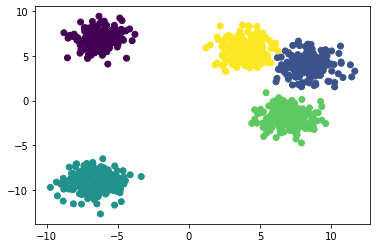

In [26]:
plt.scatter(blobs.x, blobs.y, c = km_tuned.labels_) # Verificamos gráficamente el agrupamiento

## Clustering jerárquico

Para explorar el funcionamiento del clustering jerárquico utilizaremos un conjunto de datos en donde los grupos no tienen una configuración circular.

In [27]:
moons = pd.read_csv("data/twomoons.csv")

In [28]:
moons.head()

,x,y
0,1.725508,-0.043207
1,-0.826517,0.559084
2,1.964777,0.217817
3,1.453529,-0.398344
4,0.030248,0.465012


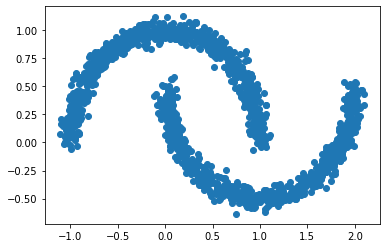

In [29]:
plt.scatter(moons.x, moons.y)

Ajustamos un modelo de k-means para demostrar que el comportamiento de este modelo no es el más correcto.

In [30]:
km_moons = sklearn.cluster.KMeans(n_clusters=2, random_state=11)
km_moons.fit(moons)

KMeans(n_clusters=2, random_state=11)

In [31]:
km.labels_

array([1, 8, 0, 1, 4, 2, 4, 6, 8, 7, 1, 3, 6, 5, 1, 8, 0, 1, 1, 3, 7, 1,
       1, 7, 4, 7, 6, 5, 4, 1, 8, 7, 1, 5, 7, 5, 1, 5, 8, 8, 0, 8, 1, 7,
       6, 1, 1, 2, 4, 3, 5, 8, 4, 5, 1, 1, 6, 0, 0, 0, 2, 8, 3, 5, 1, 7,
       5, 0, 5, 2, 0, 7, 1, 5, 1, 8, 0, 0, 3, 8, 6, 8, 2, 5, 0, 3, 3, 8,
       1, 1, 5, 3, 1, 1, 4, 3, 1, 3, 5, 5, 5, 0, 7, 5, 4, 2, 2, 3, 7, 0,
       2, 5, 5, 7, 1, 5, 7, 2, 8, 0, 8, 7, 7, 8, 1, 6, 5, 0, 1, 1, 6, 7,
       5, 8, 1, 7, 8, 4, 4, 8, 3, 0, 8, 1, 7, 5, 8, 6, 6, 1, 3, 7, 7, 4,
       0, 1, 4, 3, 1, 0, 3, 0, 0, 8, 2, 3, 6, 8, 1, 7, 4, 0, 1, 4, 1, 7,
       4, 1, 0, 7, 6, 5, 5, 0, 7, 7, 6, 7, 1, 6, 8, 8, 7, 0, 7, 4, 5, 5,
       4, 7, 4, 5, 7, 7, 6, 1, 5, 2, 4, 5, 7, 6, 6, 4, 0, 0, 3, 6, 6, 7,
       3, 1, 4, 0, 2, 3, 3, 8, 4, 7, 1, 5, 4, 0, 4, 4, 8, 8, 1, 0, 2, 3,
       3, 0, 4, 5, 4, 5, 7, 7, 0, 8, 5, 7, 0, 4, 4, 2, 0, 6, 5, 5, 7, 2,
       6, 3, 8, 2, 4, 4, 1, 2, 6, 1, 3, 3, 1, 0, 1, 6, 1, 8, 4, 7, 1, 1,
       4, 7, 3, 3, 5, 8, 6, 7, 1, 2, 5, 2, 6, 1, 8,

Observamos que el agrupamiento que se realizó con k-means no se ajusta a nuestro conjunto de datos.

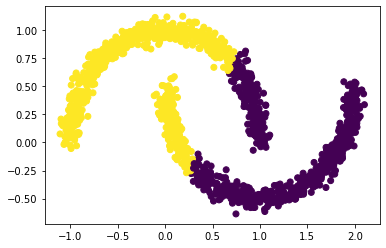

In [32]:
plt.scatter(moons.x, moons.y, c = km_moons.labels_)

Ajustamos un modelo de clustering jerárquico.

In [33]:
ac = sklearn.cluster.AgglomerativeClustering()
ac.fit(moons)

AgglomerativeClustering()

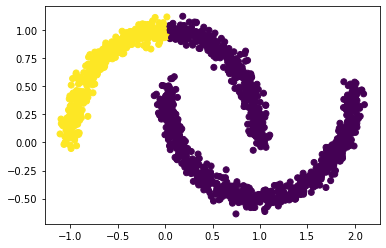

In [34]:
plt.scatter(moons.x, moons.y, c = ac.labels_)

Nuestro modelo tampoco se comporta como esperamos porque existe un hiperparámetro que debemos ajustar. El clustering jerárquico puede utilizar distintos métodos para poder medir la distancia entre clusters y así poder unirlos o no. Evaluemos el funcionamiento de nuestro modelo al visualizar el agrupamiento utilizando los distintos métodos de enlace.

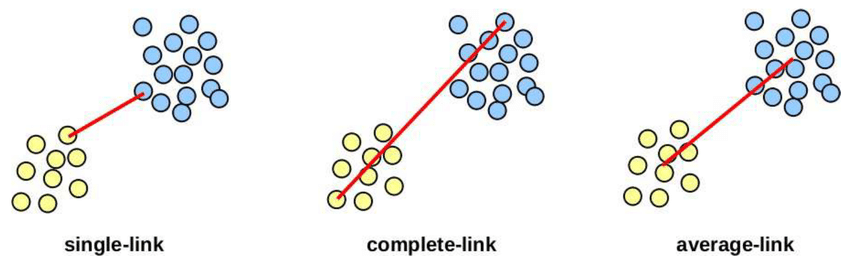

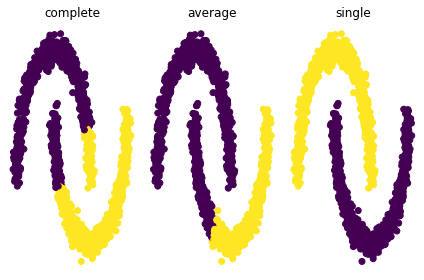

In [35]:
linkage_methods = ["complete", "average", "single"]
fig, axs = plt.subplots(ncols=len(linkage_methods))
for i,l in enumerate(linkage_methods):
    ac_current = sklearn.cluster.AgglomerativeClustering(linkage=l)
    ac_current.fit(moons)
    axs[i].scatter(moons.x, moons.y, c = ac_current.labels_)
    axs[i].set_title(l)
    axs[i].axis('off')
plt.tight_layout()

Para nuestro conjunto de datos el mejor método es single.

In [36]:
ac_tuned = sklearn.cluster.AgglomerativeClustering(linkage="single")
ac_tuned.fit(moons)

AgglomerativeClustering(linkage='single')

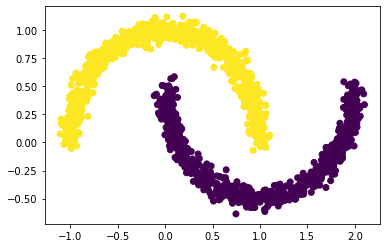

In [37]:
plt.scatter(moons.x, moons.y, c = ac_tuned.labels_)

## DBSCAN

Density-based spatial clustering of applications with noise (DBSCAN) es un algoritmo de clustering que no necesita ser inicializado con una cantidad de grupos específica. Este algortmo se basa en encontrar nubes densas de puntos para determinar los cluster.

Utilizaremos un conjunto de datos de atributos de clientes para segmentarlos de manera automática

In [38]:
customers = pd.read_csv("data/customers.csv",sep=";")

In [39]:
customers.head()

,age,annual_income,spending_score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


Los atributos del conjunto de datos están en distintos rangos.

In [40]:
customers.describe()

,age,annual_income,spending_score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


Escalamos los atributos.

In [41]:
scaler = sklearn.preprocessing.MinMaxScaler()
customers_scaled = pd.DataFrame(
    scaler.fit_transform(customers),
    columns = customers.columns
)

In [42]:
customers_scaled.head()

,age,annual_income,spending_score
0,0.019231,0.000000,0.387755
1,0.057692,0.000000,0.816327
2,0.038462,0.008197,0.051020
3,0.096154,0.008197,0.775510
4,0.250000,0.016393,0.397959


Describimos la distribución final de las características.

In [43]:
customers_scaled.describe()

,age,annual_income,spending_score
count,200.000000,200.000000,200.000000
mean,0.400962,0.373443,0.502041
std,0.268635,0.215285,0.263505
min,0.000000,0.000000,0.000000
25%,0.206731,0.217213,0.344388
50%,0.346154,0.381148,0.500000
75%,0.596154,0.516393,0.734694
max,1.000000,1.000000,1.000000


Esta es la distribución espacial de los clientes respecto a sus atributos.

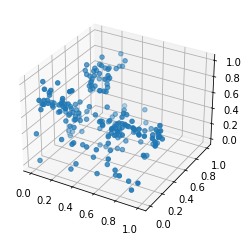

In [44]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(
    customers_scaled.age,
    customers_scaled.annual_income,
    customers_scaled.spending_score
)
plt.show()

Instanciamos DBSCAN con sus hieperparámetros por defecto.

In [45]:
dbscan = sklearn.cluster.DBSCAN()

In [46]:
dbscan.fit(customers_scaled)

DBSCAN()

El algoritmo no funcionó como esperábamos.

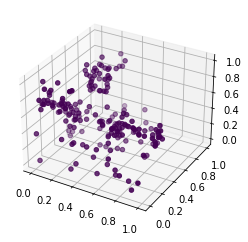

In [47]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(
    customers_scaled.age, # Vamos a graficar la edad del cliente en el eje x
    customers_scaled.annual_income, # EL ingreso anual en el eje y
    customers_scaled.spending_score, # El puntaje de gasto en el eje z
    c = dbscan.labels_ # Pintamos cada uno de los clientes con el grupo asignado por k means
)
plt.show()

El hiperparámetro más importante es $\epsilon$, el cual determina la mayor distancia entre dos puntos para ser considerados vecinos.

Iteraremos sobre una serie de $\epsilon$ para determinar cuál funciona mejor.

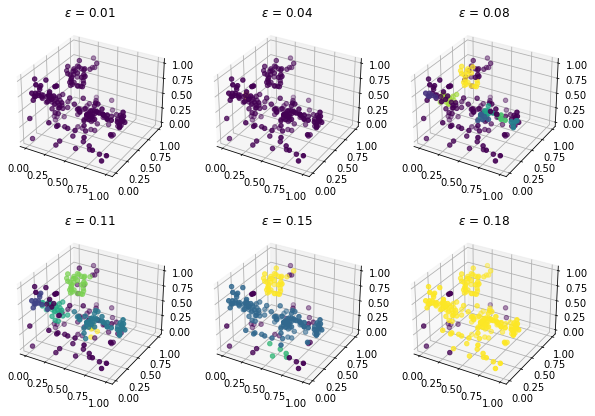

In [48]:
epss = np.linspace(0.01,0.18,6)
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(10,7), subplot_kw={'projection': "3d"})
for i,ax in enumerate(axs.reshape(-1)): 
    current_dbscan = sklearn.cluster.DBSCAN(epss[i])
    current_dbscan.fit(customers_scaled)
    ax.scatter(
        customers_scaled.age, # Vamos a graficar la edad del cliente en el eje x
        customers_scaled.annual_income, # EL ingreso anual en el eje y
        customers_scaled.spending_score, # El puntaje de gasto en el eje z
        c = current_dbscan.labels_ # Pintamos cada uno de los clientes con el grupo asignado por k means
    )
    ax.set_title(f"$\epsilon$ = {round(epss[i],2)}")